In [47]:
import pandas as pd
import numpy as np

In [48]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [49]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
missing_train = df_train.isnull().sum().reset_index()
missing_train.columns = ["Column", "Missing_Count"]
missing_train = missing_train[missing_train["Missing_Count"] >= 1]
missing_train

,Column,Missing_Count
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,872
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


In [51]:
missing_test = df_test.isnull().sum().reset_index()
missing_test.columns = ["Column", "Missing_Count"]
missing_test = missing_test[missing_test["Missing_Count"] >= 1]
missing_test

,Column,Missing_Count
2,MSZoning,4
3,LotFrontage,227
6,Alley,1352
9,Utilities,2
23,Exterior1st,1
24,Exterior2nd,1
25,MasVnrType,894
26,MasVnrArea,15
30,BsmtQual,44
31,BsmtCond,45


In [52]:
df_train["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [53]:
df_test["SaleType"].value_counts()

SaleType
WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: count, dtype: int64

In [54]:
from sklearn.impute import SimpleImputer

# Define replacement values for categorical columns
cat_vals = {
    "MSZoning" : "RL", 
    "Alley": "None", 
    "Utilities" : "AllPub", 
    "Exterior1st" : "VinylSd", 
    "Exterior2nd" : "VinylSd", 
    "MasVnrType" : "CBlock", 
    "BsmtQual" : "No Basement", 
    "BsmtCond" : "No Basement", 
    "BsmtExposure" : "No Basement", 
    "BsmtFinType1": "No Basement", 
    "BsmtFinType2" : "No Basement", 
    "Electrical" : "Mix", 
    "KitchenQual" : "TA", 
    "Functional" : "Typ", 
    "FireplaceQu" : "No Fireplace", 
    "GarageType" : "No Garage", 
    "GarageFinish" : "No Garage", 
    "GarageQual" : "No Garage", 
    "GarageCond" : "No Garage", 
    "PoolQC" : "TA", 
    "Fence" : "No Fence", 
    "MiscFeature" : "Elev", 
    "SaleType" : "WD"
}

In [55]:
# Separate numerical and categorical data
num_data = df_train.select_dtypes(include = ["int", "float"])
cat_data = df_train.select_dtypes(include = ["object"])

# Create imputer for numerical data
num_imputer = SimpleImputer(strategy = "mean")

# Fit and transform numerical data
num_imp = num_imputer.fit_transform(num_data)

# Convert imputed numerical data back to DataFrame
num_df = pd.DataFrame(num_imp, columns = num_data.columns)

# Fill NaN values in categorical data using replacement values
for col in cat_data.columns:
    if col in cat_vals:
        cat_data[col] = cat_data[col].fillna(cat_vals[col])
    else:
        cat_data[col] = cat_data[col].fillna("Unknown")

# Concatenate imputed numerical and categorical DataFrames
train = pd.concat([num_df, cat_data], axis=1)

train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,Attchd,RFn,TA,TA,Y,TA,No Fence,Elev,WD,Normal
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,Attchd,RFn,TA,TA,Y,TA,No Fence,Elev,WD,Normal
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,Attchd,RFn,TA,TA,Y,TA,No Fence,Elev,WD,Normal
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,Detchd,Unf,TA,TA,Y,TA,No Fence,Elev,WD,Abnorml
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,Attchd,RFn,TA,TA,Y,TA,No Fence,Elev,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,Attchd,RFn,TA,TA,Y,TA,No Fence,Elev,WD,Normal
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,Attchd,Unf,TA,TA,Y,TA,MnPrv,Elev,WD,Normal
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,Attchd,RFn,TA,TA,Y,TA,GdPrv,Shed,WD,Normal
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,Attchd,Unf,TA,TA,Y,TA,No Fence,Elev,WD,Normal


In [56]:
missing_train = train.isnull().sum().reset_index()
missing_train.columns = ["Column", "Missing_Count"]
missing_train = missing_train[missing_train["Missing_Count"] >= 1]
missing_train

,Column,Missing_Count


In [57]:
# Separate numerical and categorical data
num_data = df_test.select_dtypes(include = ["int", "float"])
cat_data = df_test.select_dtypes(include = ["object"])

# Create imputer for numerical data
num_imputer = SimpleImputer(strategy = "mean")

# Fit and transform numerical data
num_imp = num_imputer.fit_transform(num_data)

# Convert imputed numerical data back to DataFrame
num_df = pd.DataFrame(num_imp, columns = num_data.columns)

# Fill NaN values in categorical data using replacement values
for col in cat_data.columns:
    if col in cat_vals:
        cat_data[col] = cat_data[col].fillna(cat_vals[col])
    else:
        cat_data[col] = cat_data[col].fillna("Unknown")

# Concatenate imputed numerical and categorical DataFrames
test = pd.concat([num_df, cat_data], axis=1)

test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,Attchd,Unf,TA,TA,Y,TA,MnPrv,Elev,WD,Normal
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,Attchd,Unf,TA,TA,Y,TA,No Fence,Gar2,WD,Normal
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,Attchd,Fin,TA,TA,Y,TA,MnPrv,Elev,WD,Normal
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,Attchd,Fin,TA,TA,Y,TA,No Fence,Elev,WD,Normal
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,Attchd,RFn,TA,TA,Y,TA,No Fence,Elev,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,...,No Garage,No Garage,No Garage,No Garage,Y,TA,No Fence,Elev,WD,Normal
1455,2916.0,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,...,CarPort,Unf,TA,TA,Y,TA,No Fence,Elev,WD,Abnorml
1456,2917.0,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,...,Detchd,Unf,TA,TA,Y,TA,No Fence,Elev,WD,Abnorml
1457,2918.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,...,No Garage,No Garage,No Garage,No Garage,Y,TA,MnPrv,Shed,WD,Normal


In [58]:
missing_test= test.isnull().sum().reset_index()
missing_test.columns = ["Column", "Missing_Count"]
missing_test = missing_test[missing_test["Missing_Count"] >= 1]
missing_test

,Column,Missing_Count


In [59]:
train.duplicated().sum()

np.int64(0)

## EXPLORATORY DATA ANALYSIS

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

In [61]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [62]:
# import plotly.express as px
# fig = px.histogram(train, x = "SalePrice", nbins = 40, marginal = "box")
# fig.show()

In [63]:
num_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [64]:
# fig = px.scatter(train, x = "MSSubClass", y = "SalePrice")
# fig.show()

In [65]:
# fig = px.scatter(train, x = "LotFrontage", y = "SalePrice")
# fig.show()

In [66]:
# fig = px.scatter(train, x = "LotArea", y = "SalePrice")
# fig.show()

In [67]:
# fig = px.scatter(train, x = "OverallQual", y = "SalePrice")
# fig.show()

In [68]:
def detect_outliers(df, column):
    """Detect outliers using Interquartile Range (IQR) method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def winsorize(df, column):
    """Winsorize data by replacing outliers with whisker values."""
    _, lower_bound, upper_bound = detect_outliers(df, column)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

num_cols = train.select_dtypes(include=["int64", "float64"]).columns
outlier_train = []

for column in num_cols:
    outliers, _, _ = detect_outliers(train, column)
    if not outliers.empty:
        outlier_train.append(column)
        # fig = px.box(train, x = train[column], title = f"Boxplot for {column}")
        # fig.show()

print("Columns with outliers:", outlier_train)

for column in outlier_train:
    train = winsorize(train, column) 

Columns with outliers: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [69]:
# for i in num_cols:
#     fig = px.box(train, x = i)
#     fig.show()

In [70]:
num_test = test.select_dtypes(include = ["int64", "float64"]).columns
outlier_test = []

for column in num_test:
  outliers, _, _ = detect_outliers(test, column)
  if not outliers.empty:
    outlier_test.append(column)
print(f"Columns with outliers: {outlier_test}")

for column in outlier_test:
  test = winsorize(test, column)

Columns with outliers: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


## FEATURE ENGINEERING

## Feature Creation

In [71]:
train["houseage"] = train["YrSold"] - train["YearBuilt"]
test["houseage"] = test["YrSold"] - test["YearBuilt"]

In [72]:
train["houseremodelage"] = train["YrSold"] - train["YearRemodAdd"]
test["houseremodelage"] = test["YrSold"] - test["YearRemodAdd"]

In [73]:
train["totalsf"] = train["1stFlrSF"] + train["2ndFlrSF"] + train["BsmtFinSF1"] + train["BsmtFinSF2"]
test["totalsf"] = test["1stFlrSF"] + test["2ndFlrSF"] + test["BsmtFinSF1"] + test["BsmtFinSF2"]

In [74]:
train["totalarea"] = train["GrLivArea"] + train["TotalBsmtSF"]
test["totalarea"] = test["GrLivArea"] + test["TotalBsmtSF"]

In [75]:
train["totalbaths"] = train["BsmtFullBath"] + train["FullBath"] + 0.5 * (train["BsmtHalfBath"] + train["HalfBath"]) 
test["totalbaths"] = test["BsmtFullBath"] + test["FullBath"] + 0.5 * (test["BsmtHalfBath"] + test["HalfBath"]) 

In [76]:
train["totalporchsf"] = train["OpenPorchSF"] + train["3SsnPorch"] + train["EnclosedPorch"] + train["ScreenPorch"] + train["WoodDeckSF"]
test["totalporchsf"] = test["OpenPorchSF"] + test["3SsnPorch"] + test["EnclosedPorch"] + test["ScreenPorch"] + test["WoodDeckSF"]

In [77]:
train = train.drop(columns=["Id","YrSold", "YearBuilt", "YearRemodAdd", "1stFlrSF", "2ndFlrSF", "BsmtFinSF1", 
"BsmtFinSF2", "GrLivArea", "TotalBsmtSF","BsmtFullBath", "FullBath", "BsmtHalfBath", "HalfBath", "OpenPorchSF", 
"3SsnPorch", "EnclosedPorch", "ScreenPorch","WoodDeckSF", "GarageArea", "PoolQC", "MiscFeature", "Alley", "Fence", 
                            "GarageYrBlt", "GarageCond", "BsmtFinType2"])

test = test.drop(columns=["YrSold", "YearBuilt", "YearRemodAdd", "1stFlrSF", "2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2", "GrLivArea", 
"TotalBsmtSF","BsmtFullBath", "FullBath", "BsmtHalfBath", "HalfBath", "OpenPorchSF", "3SsnPorch", "EnclosedPorch", "ScreenPorch",
"WoodDeckSF", "GarageArea", "PoolQC", "MiscFeature", "Alley", "Fence", "GarageYrBlt", "GarageCond", "BsmtFinType2"])

In [78]:
## Encoding Categorical variable
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
category = train.select_dtypes(include=["object","category"])
for x in category:
    train[x] = encoder.fit_transform(train[x])
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,...,GarageQual,PavedDrive,SaleType,SaleCondition,houseage,houseremodelage,totalsf,totalarea,totalbaths,totalporchsf
0,60.0,65.0,8450.0,7.0,5.0,196.0,150.0,0.0,3.0,1.0,...,5,2,8,4,5.0,5.0,2416.0,2566.0,3.5,61.0
1,20.0,80.0,9600.0,6.0,7.5,0.0,284.0,0.0,3.0,1.0,...,5,2,8,4,31.0,31.0,2240.0,2524.0,2.0,298.0
2,60.0,68.0,11250.0,7.0,5.0,162.0,434.0,0.0,3.0,1.0,...,5,2,8,4,7.0,6.0,2272.0,2706.0,3.5,42.0
3,70.0,60.0,9550.0,7.0,5.0,0.0,540.0,0.0,3.0,1.0,...,5,2,8,0,91.0,36.0,1933.0,2473.0,2.0,35.0
4,60.0,84.0,14260.0,8.0,5.0,350.0,490.0,0.0,4.0,1.0,...,5,2,8,4,8.0,8.0,2853.0,3343.0,3.5,276.0


In [79]:
## Encoding Categorical variable
category = test.select_dtypes(include=["object","category"])
for x in category:
    test[x] = encoder.fit_transform(test[x])
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,BedroomAbvGr,...,GarageQual,PavedDrive,SaleType,SaleCondition,houseage,houseremodelage,totalsf,totalarea,totalbaths,totalporchsf
0,1461.0,20.0,80.0,11622.0,5.0,6.0,0.0,270.0,0.0,2.0,...,4,2,8,4,49.0,49.0,1364.0,1778.0,1.0,140.0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,108.0,406.0,0.0,3.0,...,4,2,8,4,52.0,52.0,2252.0,2658.0,1.5,429.0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,0.0,137.0,0.0,3.0,...,4,2,8,4,13.0,12.0,2420.0,2557.0,2.5,246.0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,20.0,324.0,0.0,3.0,...,4,2,8,4,12.0,12.0,2206.0,2530.0,2.5,396.0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,0.0,1017.0,0.0,2.0,...,4,2,8,4,18.0,18.0,1543.0,2560.0,2.0,82.0


In [80]:
## Seperating Independent Variables from Dependent Variables
features = train.drop('SalePrice', axis=1) ## Independent variables
target = train['SalePrice'] ## Dependent variable

In [81]:
def drop_correlated_features(features, target, threshold = 0.6):

    while True:
        # Calculate correlation matrix
        corr_matrix = features.corr()

        # Identify highly correlated feature pairs
        correlated_features = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > threshold:
                    correlated_features.append((corr_matrix.columns[i], corr_matrix.columns[j]))

        # If no correlated features, break the loop
        if not correlated_features:
            break

        # Drop the feature less correlated to the target variable
        for feature1, feature2 in correlated_features:
            if feature1 in features.columns and feature2 in features.columns:
                corr1 = abs(features[feature1].corr(target))
                corr2 = abs(features[feature2].corr(target))
                if corr1 < corr2:
                    features = features.drop(columns=[feature1])
                else:
                    features = features.drop(columns=[feature2])

    return features

In [82]:
features = drop_correlated_features(features, target)
features

,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,KitchenAbvGr,Fireplaces,PoolArea,MiscVal,...,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,SaleCondition,houseage,houseremodelage,totalarea,totalporchsf
0,65.0,8450.0,5.0,196.0,150.0,0.0,1.0,0.0,0.0,0.0,...,1,2,5,2,8,4,5.0,5.0,2566.0,61.0
1,80.0,9600.0,7.5,0.0,284.0,0.0,1.0,1.0,0.0,0.0,...,1,2,5,2,8,4,31.0,31.0,2524.0,298.0
2,68.0,11250.0,5.0,162.0,434.0,0.0,1.0,1.0,0.0,0.0,...,1,2,5,2,8,4,7.0,6.0,2706.0,42.0
3,60.0,9550.0,5.0,0.0,540.0,0.0,1.0,1.0,0.0,0.0,...,5,3,5,2,8,0,91.0,36.0,2473.0,35.0
4,84.0,14260.0,5.0,350.0,490.0,0.0,1.0,1.0,0.0,0.0,...,1,2,5,2,8,4,8.0,8.0,3343.0,276.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,5.0,0.0,953.0,0.0,1.0,1.0,0.0,0.0,...,1,2,5,2,8,4,8.0,7.0,2600.0,40.0
1456,85.0,13175.0,6.0,119.0,589.0,0.0,1.0,2.0,0.0,0.0,...,1,3,5,2,8,4,32.0,22.0,3615.0,349.0
1457,66.0,9042.0,7.5,0.0,877.0,0.0,1.0,2.0,0.0,0.0,...,1,2,5,2,8,4,69.0,4.0,3492.0,60.0
1458,68.0,9717.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,3,5,2,8,4,60.0,14.0,2156.0,366.0


In [83]:
features.describe().iloc[:, 30:]

,BsmtFinType1,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,SaleCondition,houseage,houseremodelage,totalarea,totalporchsf
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.150000,1.036301,1.538356,0.934932,3.681507,2.339726,5.749315,3.087671,2.485616,1.876712,4.716438,1.856164,7.513014,3.770548,36.516438,22.950000,2553.990668,134.410274
std,2.251517,0.295124,1.739524,0.246731,1.051420,0.830161,0.979659,1.167523,1.933206,1.191646,0.898787,0.496592,1.552100,1.100854,30.155305,20.640653,738.238038,131.754328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,376.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,4.000000,2.000000,6.000000,2.000000,1.000000,1.000000,5.000000,2.000000,8.000000,4.000000,8.000000,4.000000,2014.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,4.000000,3.000000,6.000000,3.000000,1.000000,2.000000,5.000000,2.000000,8.000000,4.000000,35.000000,14.000000,2479.000000,112.000000
75%,6.000000,1.000000,4.000000,1.000000,4.000000,3.000000,6.000000,3.000000,5.000000,3.000000,5.000000,2.000000,8.000000,4.000000,54.000000,41.000000,3008.500000,218.250000
max,6.000000,5.000000,4.000000,1.000000,4.000000,3.000000,6.000000,5.000000,6.000000,3.000000,5.000000,2.000000,8.000000,5.000000,125.000000,60.000000,4799.625000,590.000000


## Feature Scaling

In [84]:
## Select columns to scale
cols = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtUnfSF", "MiscVal", "totalarea", "totalporchsf", "houseage", "houseremodelage"]

In [85]:
from sklearn.preprocessing import StandardScaler

# Initialize MinMaxScaler
scaler = StandardScaler()

# Fit and transform the scaler to the numeric columns
features[cols] = scaler.fit_transform(features[cols])

features.head()

,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,KitchenAbvGr,Fireplaces,PoolArea,MiscVal,...,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,SaleCondition,houseage,houseremodelage,totalarea,totalporchsf
0,-0.248215,-0.333244,5.0,0.792353,-0.958790,0.0,1.0,0.0,0.0,0.0,...,1,2,5,2,8,4,-1.045496,-0.869941,0.016273,-0.557366
1,0.622375,-0.013189,7.5,-0.672399,-0.648290,0.0,1.0,1.0,0.0,0.0,...,1,2,5,2,8,4,-0.182997,0.390141,-0.040639,1.242052
2,-0.074097,0.446022,5.0,0.538263,-0.300716,0.0,1.0,1.0,0.0,0.0,...,1,2,5,2,8,4,-0.979149,-0.821476,0.205979,-0.701624
3,-0.538412,-0.027104,5.0,-0.672399,-0.055097,0.0,1.0,1.0,0.0,0.0,...,5,3,5,2,8,0,1.807384,0.632464,-0.109746,-0.754771
4,0.854532,1.283733,5.0,1.943229,-0.170955,0.0,1.0,1.0,0.0,0.0,...,1,2,5,2,8,4,-0.945976,-0.724547,1.069140,1.075018


## Spliting dataset into training and testing sets 

In [86]:
from sklearn.model_selection import train_test_split

# Split training and temporary sets
X_train, X_val_test, y_train, y_val_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

# Split validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state = 42)

In [87]:
# Verify split proportions
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 1022
Validation set size: 219
Testing set size: 219


## Feature Selection

In [88]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
r2_score_list = []
mse_list = []
k_values = range(1, 49)

# Initialize XGBRegressor
xgb = XGBRegressor(random_state=13)

for k in k_values:
    # Select k best features using mutual info regression
    selector = SelectKBest(mutual_info_regression, k=k)
    selector.fit(X_train, y_train)
    
    # Transform training, validation and testing data
    sel_X_train = selector.transform(X_train)
    sel_X_val = selector.transform(X_val)
    sel_X_test = selector.transform(X_test)
    
    # Train and evaluate XGBRegressor on validation set
    xgb.fit(sel_X_train, y_train)
    kbest_preds_val = xgb.predict(sel_X_val)
    kbest_preds_test = xgb.predict(sel_X_test)
    
    # Calculate R2 score and MSE on validation and test sets
    r2_score_kbest_val = round(r2_score(y_val, kbest_preds_val), 2)
    r2_score_kbest_test = round(r2_score(y_test, kbest_preds_test), 2)
    mse_kbest_val = round(mean_squared_error(y_val, kbest_preds_val), 2)
    mse_kbest_test = round(mean_squared_error(y_test, kbest_preds_test), 2)
    
    # Append results to lists
    r2_score_list.append(r2_score_kbest_val)
    mse_list.append(mse_kbest_val)

# Find optimal k value
optimal_k = k_values[np.argmax(r2_score_list)]
print(f'Optimal k value: {optimal_k}')
print(f'Best Validation R2 Score: {max(r2_score_list)}')
print(f'Test R2 Score at optimal k: {r2_score_kbest_test}')
print(f'Test MSE at optimal k: {mse_kbest_test}')

Optimal k value: 19
Best Validation R2 Score: 0.91
Test R2 Score at optimal k: 0.9
Test MSE at optimal k: 434713975.58


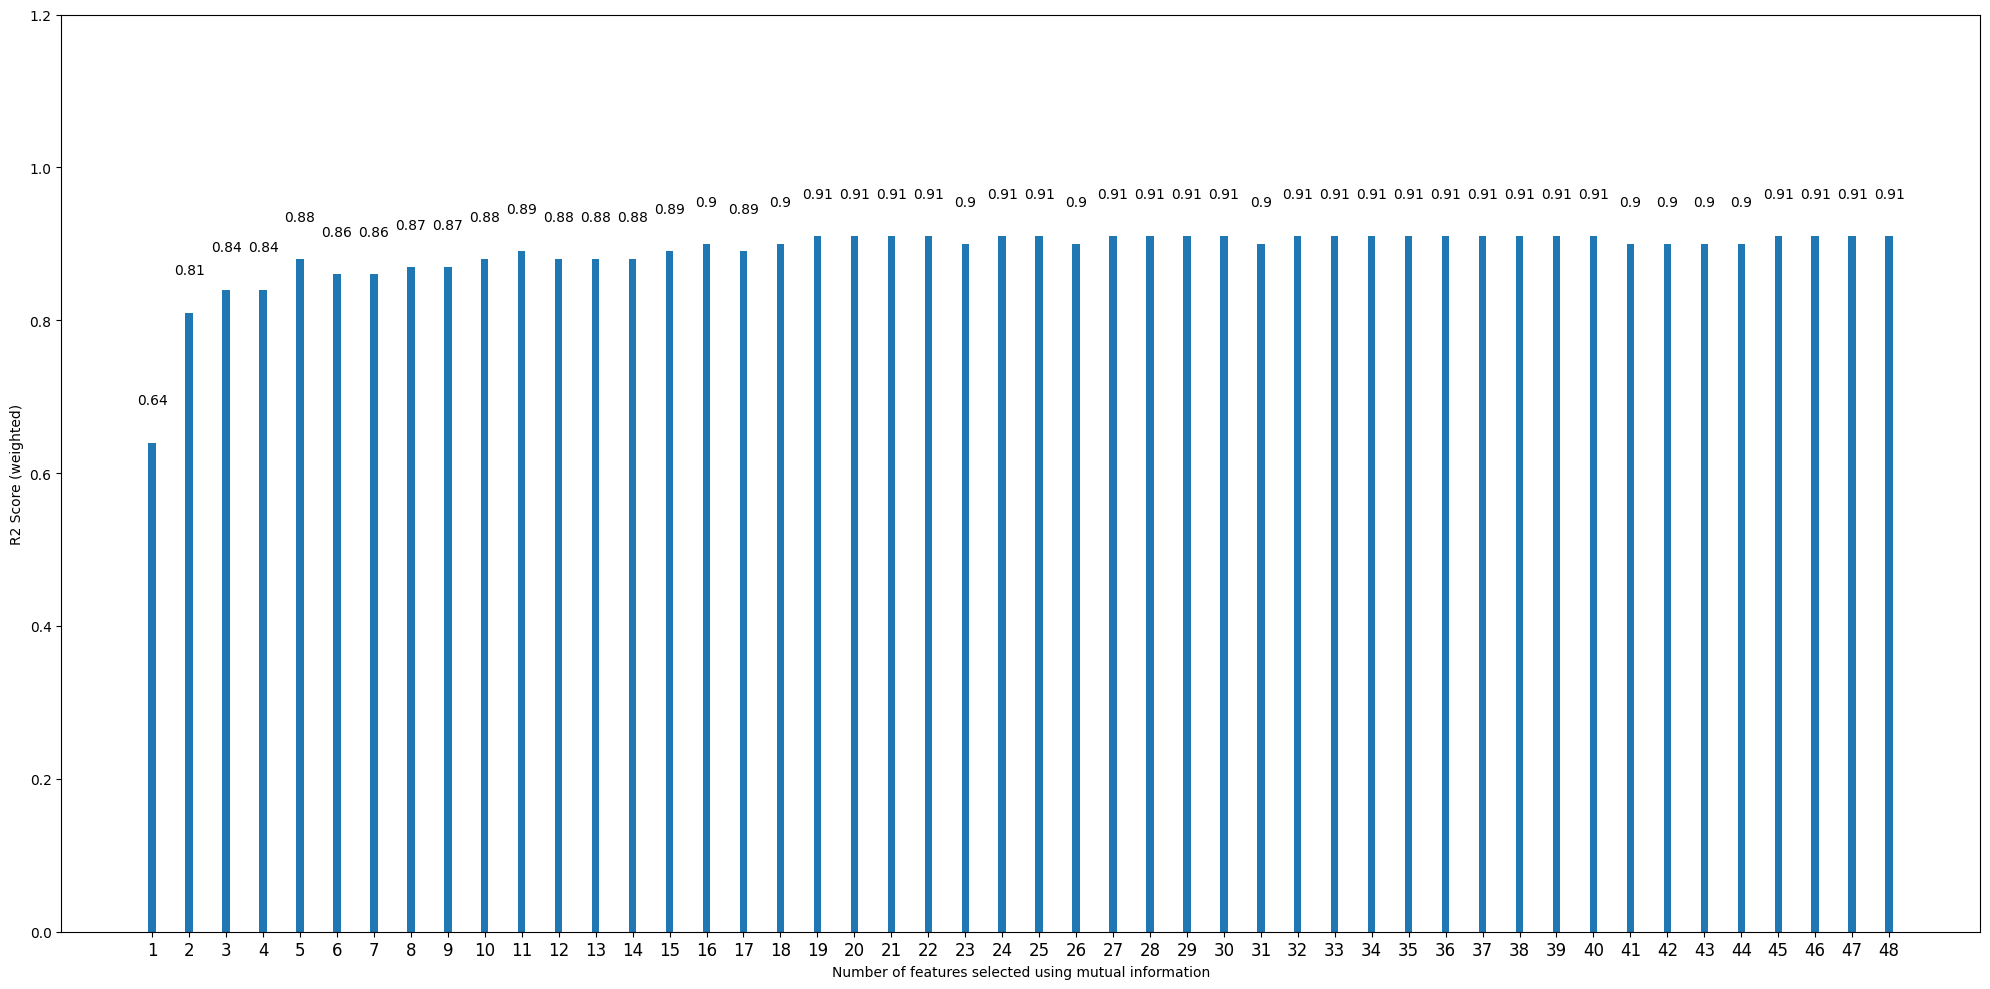

In [89]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

x = np.arange(1, 49)
y = r2_score_list

ax.bar(x, y, width = 0.2)
ax.set_xlabel("Number of features selected using mutual information")
ax.set_ylabel("R2 Score (weighted)")
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 49))
ax.set_xticklabels(np.arange(1, 49), fontsize = 12)

for i, v in enumerate(y):
  plt.text(x = i + 1, y = v + 0.05, s = str(v), ha = "center")
  
plt.tight_layout()

In [90]:
selector = SelectKBest(mutual_info_regression, k = 19)
selector.fit(X_train, y_train)

selected_features_mask = selector.get_support()

selected_features = X_train.columns[selected_features_mask]

selected_features

Index(['LotFrontage', 'LotArea', 'OverallCond', 'BsmtUnfSF', 'Fireplaces',
       'MSZoning', 'Neighborhood', 'Exterior2nd', 'MasVnrType', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'houseage', 'houseremodelage', 'totalarea', 'totalporchsf'],
      dtype='object')

In [91]:
X1 = features[selected_features]
y1 = train["SalePrice"]

In [92]:
# Initial split into training and temporary sets
X_train1, X_val_test1, y_train1, y_val_test1 = train_test_split(X1, y1, test_size = 0.4, random_state = 0)

# Split temporary set into validation and testing sets
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_val_test1, y_val_test1, test_size = 0.5, random_state = 0)

In [93]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_xgb = {
    "max_depth" : [3, 5, 7, 9, 12],
    "learning_rate" : [0.001, 0.01, 0.05, 0.1, 0.5],
    "n_estimators" : [50, 100, 150, 200, 250],
    "reg_alpha" : [0, 0.1, 0.5, 1, 2],
    "reg_lambda" : [0, 0.1, 0.5, 1, 2],
    "gamma" : [0, 0.1, 0.5, 1],
    'subsample': [0.5, 0.7, 0.8, 1],
    'colsample_bytree': [0.5, 0.7, 0.8, 1],
    'colsample_bylevel': [0.5, 0.7, 0.8, 1],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [1, 5, 10]
}

xgb_cv = RandomizedSearchCV(xgb, param_grid_xgb, cv = 3, scoring = "neg_mean_squared_error", n_jobs = -1)

In [104]:
xgb_cv.fit(X_train1, y_train1)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'colsample_bylevel': [0.5, 0.7, 0.8, 1],
                                        'colsample_bytree': [0.5, 0.7, 0.8, 1],
                                        'gamma': [0, 0.1, 0.5, 1],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 0.5],
                                        'max_depth': [3, 5, 7, 9, 12],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250],
                                        'reg_alpha': [0, 0.1, 0.5, 1, 2],
                                        'reg_lambda': [0, 0.1, 0.5, 1, 2],
                                        'scale_pos_weight': [1, 5, 10],
                                        'subsample': [0.5, 0.7, 0.8, 1]},
                   scoring='neg_mean_squared_error')

In [105]:
# Predict on validation set
y_pred_val_xgb = xgb_cv.best_estimator_.predict(X_val1)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
# Evaluate model performance on validation set
mse_val = mean_squared_error(y_val1, y_pred_val_xgb)
rmse_val = mse_val ** 0.5
r2_val = r2_score(y_val1, y_pred_val_xgb)
mae_val = mean_absolute_error(y_val1, y_pred_val_xgb)
mdae_val = median_absolute_error(y_val1, y_pred_val_xgb)

print("Validation Set Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R-squared score: {r2_val:.2f}")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Median Absolute Error (MDAE): {mdae_val:.2f}")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")

Validation Set Performance:
Root Mean Squared Error (RMSE): 23349.12
R-squared score: 0.88
Mean Absolute Error (MAE): 15587.69
Median Absolute Error (MDAE): 11482.54
Mean Squared Error (MSE): 545181201.86


In [107]:
# Predict on testing set
y_pred_test_xgb = xgb_cv.best_estimator_.predict(X_test1)

In [108]:
# Evaluate model performance on testing set
mse_test = mean_squared_error(y_test1, y_pred_test_xgb)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test1, y_pred_test_xgb)
mae_test = mean_absolute_error(y_test1, y_pred_test_xgb)
mdae_test = median_absolute_error(y_test1, y_pred_test_xgb)

print("\nTesting Set Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared score: {r2_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Median Absolute Error (MDAE): {mdae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")


Testing Set Performance:
Root Mean Squared Error (RMSE): 19660.84
R-squared score: 0.90
Mean Absolute Error (MAE): 14359.46
Median Absolute Error (MDAE): 10508.53
Mean Squared Error (MSE): 386548642.94


In [109]:
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, RandomForestRegressor, VotingRegressor
from lightgbm import LGBMRegressor

In [110]:
rfr = RandomForestRegressor(random_state=13)

param_grid_rfr = {
    'max_depth': [3, 5, 10, 15, 20],
    'n_estimators': [50, 100, 250, 500, 1000],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'criterion': ['absolute_error', 'squared_error', 'friedman_mse', 'poisson'],
    'max_samples': [0.5, 0.7, 0.8, 1],
    'min_weight_fraction_leaf': [0, 0.1, 0.3],
    'min_impurity_decrease': [0, 0.1, 0.3],
    'warm_start': [True, False]
}

rfr_cv = RandomizedSearchCV(rfr, param_grid_rfr, cv = 5, scoring='neg_mean_squared_error',  n_jobs = -1, n_iter = 10)

In [111]:
rfr_cv.fit(X_train1, y_train1)

c:\Users\GADGETS HUB ABUJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['absolute_error',
                                                      'squared_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [3, 5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.5, 0.7, 0.8, 1],
                                        'min_impurity_decrease': [0, 0.1, 0.3],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'min_weight_fraction_leaf': [0, 0.1,
                                                                     0.3],
                                        'n_estimators': [50, 100, 250, 500,
                                                         1000],
                                        'warm_start': [True, False]},
                   scoring='neg_mean_squared_error')

In [112]:
# Predict on validation set
y_pred_val_rfr = rfr_cv.best_estimator_.predict(X_val1)

In [113]:
# Evaluate model performance on validation set
mse_val = mean_squared_error(y_val1, y_pred_val_rfr)
rmse_val = mse_val ** 0.5
r2_val = r2_score(y_val1, y_pred_val_rfr)
mae_val = mean_absolute_error(y_val1, y_pred_val_rfr)
mdae_val = median_absolute_error(y_val1, y_pred_val_rfr)

print("Validation Set Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R-squared score: {r2_val:.2f}")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Median Absolute Error (MDAE): {mdae_val:.2f}")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")

Validation Set Performance:
Root Mean Squared Error (RMSE): 24639.50
R-squared score: 0.87
Mean Absolute Error (MAE): 17336.92
Median Absolute Error (MDAE): 12864.97
Mean Squared Error (MSE): 607105058.14


In [114]:
# Predict on testing set
y_pred_test_rfr = rfr_cv.best_estimator_.predict(X_test1)

In [115]:
# Evaluate model performance on testing set
mse_test = mean_squared_error(y_test1, y_pred_test_rfr)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test1, y_pred_test_rfr)
mae_test = mean_absolute_error(y_test1, y_pred_test_rfr)
mdae_test = median_absolute_error(y_test1, y_pred_test_rfr)

print("\nTesting Set Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared score: {r2_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Median Absolute Error (MDAE): {mdae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")


Testing Set Performance:
Root Mean Squared Error (RMSE): 21613.07
R-squared score: 0.88
Mean Absolute Error (MAE): 15047.95
Median Absolute Error (MDAE): 11038.98
Mean Squared Error (MSE): 467124614.78


In [ ]:
gbr = GradientBoostingRegressor()

param_grid_gbr = {
    'loss': ['absolute_error', 'squared_error', 'quantile'],
    'max_depth': [3, 5, 10, 12, 15, 20],
    'n_estimators': [50, 100, 200, 300, 500, 1000],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5],
    'max_features': ['sqrt', 'log2', None, 0.1, 0.5, 1],
    'subsample': [0.5, 0.7, 0.8, 1],
    'alpha': [0.1, 0.5, 0.9],
    'warm_start': [True, False]
}

gbr_cv = RandomizedSearchCV(gbr, param_grid_gbr, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1, n_iter=50)

In [ ]:
gbr_cv.fit(X_train1, y_train1)

In [ ]:
# Predict on validation set
y_pred_val_gbr = gbr_cv.best_estimator_.predict(X_val1)

In [ ]:
# Evaluate model performance on validation set
mse_val = mean_squared_error(y_val1, y_pred_val_gbr)
rmse_val = mse_val ** 0.5
r2_val = r2_score(y_val1, y_pred_val_gbr)
mae_val = mean_absolute_error(y_val1, y_pred_val_gbr)
mdae_val = median_absolute_error(y_val1, y_pred_val_gbr)

print("Validation Set Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R-squared score: {r2_val:.2f}")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Median Absolute Error (MDAE): {mdae_val:.2f}")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")

Validation Set Performance:
Root Mean Squared Error (RMSE): 23435.88
R-squared score: 0.88
Mean Absolute Error (MAE): 14971.15
Median Absolute Error (MDAE): 9236.99
Mean Squared Error (MSE): 549240442.05


In [ ]:
# Predict on testing set
y_pred_test_gbr = gbr_cv.best_estimator_.predict(X_test1)

In [ ]:
# Evaluate model performance on testing set
mse_test = mean_squared_error(y_test1, y_pred_test_gbr)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test1, y_pred_test_gbr)
mae_test = mean_absolute_error(y_test1, y_pred_test_gbr)
mdae_test = median_absolute_error(y_test1, y_pred_test_gbr)

print("\nTesting Set Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared score: {r2_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Median Absolute Error (MDAE): {mdae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")


Testing Set Performance:
Root Mean Squared Error (RMSE): 19626.56
R-squared score: 0.90
Mean Absolute Error (MAE): 13930.53
Median Absolute Error (MDAE): 9777.34
Mean Squared Error (MSE): 385201981.86


In [116]:
lgbm = LGBMRegressor(silent = True)

param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'min_data_in_leaf': [20, 50, 100],
    'min_sum_hessian_in_leaf': [0.001, 0.01, 0.1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

lgbm_cv = RandomizedSearchCV(lgbm, param_grid_lgbm, cv = 3,  scoring = 'neg_mean_squared_error', n_jobs = -1, n_iter = 50)

In [117]:
lgbm_cv.fit(X_train1, y_train1)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1261
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 19
[LightGBM] [Info] Start

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(silent=True), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'dart'],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'min_data_in_leaf': [20, 50, 100],
                                        'min_sum_hessian_in_leaf': [0.001, 0.01,
                                                                    0.1],
                                        'n_estimators': [50, 100, 200],
                                        'num_leaves': [20, 30, 40],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0, 0.1, 0.5]},
                   scoring='neg_mean_squared_error')

In [ ]:
# Predict on validation set
y_pred_val_lgbm = lgbm_cv.best_estimator_.predict(X_val1)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001


In [ ]:
# Evaluate model performance on validation set
mse_val = mean_squared_error(y_val1, y_pred_val_lgbm)
rmse_val = mse_val ** 0.5
r2_val = r2_score(y_val1, y_pred_val_lgbm)
mae_val = mean_absolute_error(y_val1, y_pred_val_lgbm)
mdae_val = median_absolute_error(y_val1, y_pred_val_lgbm)

print("Validation Set Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R-squared score: {r2_val:.2f}")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Median Absolute Error (MDAE): {mdae_val:.2f}")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")

Validation Set Performance:
Root Mean Squared Error (RMSE): 22648.26
R-squared score: 0.89
Mean Absolute Error (MAE): 15015.55
Median Absolute Error (MDAE): 9737.89
Mean Squared Error (MSE): 512943732.55


In [ ]:
# Predict on testing set
y_pred_test_lgbm = lgbm_cv.best_estimator_.predict(X_test1)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001


In [ ]:
# Evaluate model performance on testing set
mse_test = mean_squared_error(y_test1, y_pred_test_lgbm)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test1, y_pred_test_lgbm)
mae_test = mean_absolute_error(y_test1, y_pred_test_lgbm)
mdae_test = median_absolute_error(y_test1, y_pred_test_lgbm)

print("\nTesting Set Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared score: {r2_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Median Absolute Error (MDAE): {mdae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")


Testing Set Performance:
Root Mean Squared Error (RMSE): 19702.68
R-squared score: 0.90
Mean Absolute Error (MAE): 14402.34
Median Absolute Error (MDAE): 10638.91
Mean Squared Error (MSE): 388195512.59


In [ ]:
estimators = [
    ('gbr', gbr_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [ ]:
vr = VotingRegressor([('gbr', gbr_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('rfr', rfr_cv.best_estimator_)],
                     weights=[2,3,1])

In [ ]:
vr.fit(X_train1, y_train1)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(alpha=0.5,
                                                       loss='quantile',
                                                       max_depth=5,
                                                       min_samples_leaf=5,
                                                       min_samples_split=10,
                                                       n_estimators=300,
                                                       subsample=0.7)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None, colsample_bylevel=0.7,
                                          colsample_bynode=None,
                                          colsample_bytree=0.5, device=None,
                                          early_stopping_rounds=None,
                                          enable_cat...
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=13, ...)),
                            ('rfr',
                             RandomForestRegressor(criterion='absolute_error',
                                                   max_depth=15,
                                                   max_features='log2',
                                                   max_samples=0.5,
                                                   min_impurity_decrease=0,
                                                   min_samples_leaf=2,
                                                   min_samples_split=3,
                                                   min_weight_fraction_leaf=0,
                                                   n_estimators=500,
                                                   random_state=13))],
                weights=[2, 3, 1])

In [ ]:
# Predict on validation set
y_pred_val_vr = vr.predict(X_val1)

In [ ]:
# Evaluate model performance on validation set
mse_val = mean_squared_error(y_val1, y_pred_val_vr)
rmse_val = mse_val ** 0.5
r2_val = r2_score(y_val1, y_pred_val_vr)
mae_val = mean_absolute_error(y_val1, y_pred_val_vr)
mdae_val = median_absolute_error(y_val1, y_pred_val_vr)

print("Validation Set Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R-squared score: {r2_val:.2f}")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Median Absolute Error (MDAE): {mdae_val:.2f}")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")

Validation Set Performance:
Root Mean Squared Error (RMSE): 23006.61
R-squared score: 0.89
Mean Absolute Error (MAE): 14754.33
Median Absolute Error (MDAE): 9705.83
Mean Squared Error (MSE): 529303970.79


In [ ]:
# Predict on testing set
y_pred_test_vr = vr.predict(X_test1)

In [ ]:
# Evaluate model performance on testing set
mse_test = mean_squared_error(y_test1, y_pred_test_vr)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test1, y_pred_test_vr)
mae_test = mean_absolute_error(y_test1, y_pred_test_vr)
mdae_test = median_absolute_error(y_test1, y_pred_test_vr)

print("\nTesting Set Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared score: {r2_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Median Absolute Error (MDAE): {mdae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")


Testing Set Performance:
Root Mean Squared Error (RMSE): 19077.94
R-squared score: 0.91
Mean Absolute Error (MAE): 13564.29
Median Absolute Error (MDAE): 9845.14
Mean Squared Error (MSE): 363967783.71


In [ ]:
stackreg = StackingRegressor(estimators = estimators, final_estimator = gbr)

In [ ]:
stackreg.fit(X_train1, y_train1)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 23
[LightGBM] [Info] Start

StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=5,
                                                         min_samples_leaf=25,
                                                         min_samples_split=10,
                                                         n_estimators=1000,
                                                         subsample=0.8)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=0.7,
                                            colsample_bynode=None,
                                            colsample_bytree=1, device=None,
                                            early_stopping_rounds=None,
                                            enable_categori...
                               LGBMRegressor(learning_rate=0.05,
                                             min_data_in_leaf=20,
                                             min_sum_hessian_in_leaf=0.001,
                                             num_leaves=20, reg_alpha=0,
                                             reg_lambda=0.5, silent=True)),
                              ('rfr',
                               RandomForestRegressor(max_depth=5,
                                                     max_features='log2',
                                                     max_samples=0.8,
                                                     min_impurity_decrease=0.1,
                                                     min_samples_leaf=4,
                                                     min_weight_fraction_leaf=0,
                                                     random_state=13,
                                                     warm_start=True))],
                  final_estimator=GradientBoostingRegressor())

In [ ]:
# Predict on validation set
y_pred_val_st = stackreg.predict(X_val1)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001


In [ ]:
# Evaluate model performance on validation set
mse_val = mean_squared_error(y_val1, y_pred_val_st)
rmse_val = mse_val ** 0.5
r2_val = r2_score(y_val1, y_pred_val_st)
mae_val = mean_absolute_error(y_val1, y_pred_val_st)
mdae_val = median_absolute_error(y_val1, y_pred_val_st)

print("Validation Set Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R-squared score: {r2_val:.2f}")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Median Absolute Error (MDAE): {mdae_val:.2f}")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")

Validation Set Performance:
Root Mean Squared Error (RMSE): 23974.18
R-squared score: 0.88
Mean Absolute Error (MAE): 15436.12
Median Absolute Error (MDAE): 10749.00
Mean Squared Error (MSE): 574761208.12


In [ ]:
# Predict on testing set
y_pred_test_st = stackreg.predict(X_test1)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001


In [ ]:
# Evaluate model performance on testing set
mse_test = mean_squared_error(y_test1, y_pred_test_st)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test1, y_pred_test_st)
mae_test = mean_absolute_error(y_test1, y_pred_test_st)
mdae_test = median_absolute_error(y_test1, y_pred_test_st)

print("\nTesting Set Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared score: {r2_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Median Absolute Error (MDAE): {mdae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")


Testing Set Performance:
Root Mean Squared Error (RMSE): 20156.90
R-squared score: 0.90
Mean Absolute Error (MAE): 14559.08
Median Absolute Error (MDAE): 10582.97
Mean Squared Error (MSE): 406300438.19


In [ ]:
outcome = {
  "Actual Price": y_test1,
  "Predicted Price": np.round(y_pred_test_gbr)
}

df = pd.DataFrame(outcome)
df

,Actual Price,Predicted Price
1017,187500.0,174508.0
1084,187500.0,178364.0
252,173000.0,187605.0
227,106000.0,90848.0
693,108480.0,108532.0
...,...,...
546,210000.0,174798.0
1414,207000.0,179821.0
1130,135000.0,178077.0
223,97000.0,115242.0


In [ ]:
df_test_preprocess = test[selected_features]
df_test_preprocess

,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtUnfSF,Fireplaces,MSZoning,Neighborhood,HouseStyle,Exterior2nd,...,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition,houseage,houseremodelage,totalarea,totalporchsf
0,80.0,11622.00,6.0,0.0,270.0,0.0,2,12,2,12,...,3,3,1,3,8,4,49.0,49.0,1778.0,140.0
1,81.0,14267.00,6.0,108.0,406.0,0.0,3,12,2,13,...,2,3,1,3,8,4,52.0,52.0,2658.0,429.0
2,74.0,13830.00,5.0,0.0,137.0,1.0,3,8,4,12,...,3,5,1,0,8,4,13.0,12.0,2557.0,246.0
3,78.0,9978.00,6.0,20.0,324.0,1.0,3,8,4,12,...,2,2,1,0,8,4,12.0,12.0,2530.0,396.0
4,43.0,5005.00,5.0,0.0,1017.0,0.0,3,22,2,6,...,2,3,1,2,8,4,18.0,18.0,2560.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,33.0,1936.00,7.0,0.0,546.0,0.0,4,10,4,5,...,3,3,6,1,8,4,36.0,36.0,1638.0,0.0
1455,33.0,1894.00,5.0,0.0,294.0,0.0,4,10,4,5,...,3,3,4,3,8,0,36.0,36.0,1638.0,24.0
1456,105.0,17707.25,7.0,0.0,0.0,1.0,3,11,2,12,...,3,5,5,3,8,0,46.0,10.0,2448.0,420.0
1457,62.0,10441.00,5.0,0.0,575.0,0.0,3,11,5,14,...,3,3,6,1,8,4,14.0,14.0,1882.0,112.0


In [ ]:
sample = pd.read_csv("sample_submission.csv")

In [ ]:
gb = gbr_cv.predict(df_test_preprocess)

df_y_stacking_out = sample[["Id"]]
df_y_stacking_out["SalePrice"] = gb

df_y_stacking_out.to_csv("submission.csv", index = False)

c:\Users\GADGETS HUB ABUJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
import joblib

# Save the model
joblib.dump(vr, "voting_regressor_model.joblib")

# Load the model
loaded_model = joblib.load("voting_regressor_model.joblib")